# Tarea Numero 3

## Autor: Andrey Arguedas Espinoza

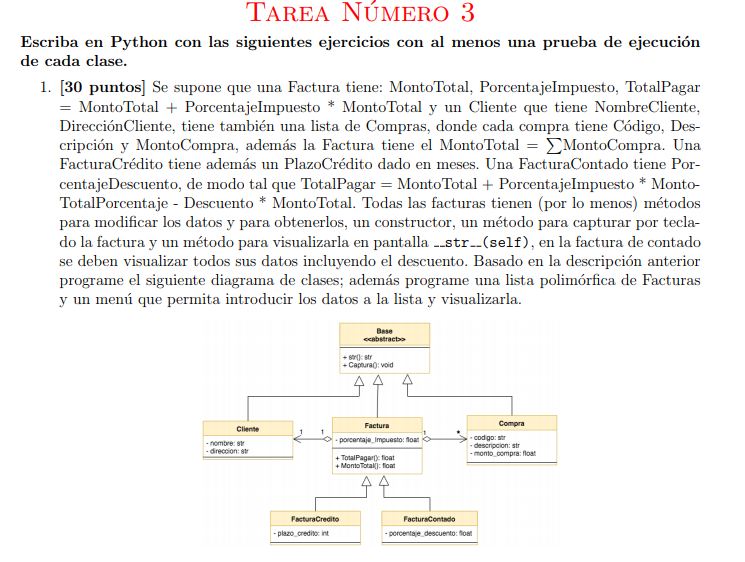

In [11]:
from abc import  ABCMeta, abstractmethod

# Clase Abstracta, ABC Class
class Base(metaclass = ABCMeta):    
    @abstractmethod
    def __str__(self):
        pass    
    @abstractmethod
    def Captura(self):
        pass
    
class Cliente(Base):
    def __init__(self, nombre = "", direccion = ""):
        self.__nombre = nombre
        self.__direccion = direccion
    @property
    def nombre(self):
        return self.__nombre
    @property
    def direccion(self):
        return self.__direccion 
    @nombre.setter
    def nombre(self, nuevo_nombre):
        self.__nombre = nuevo_nombre     
    @direccion.setter
    def direccion(self, direccion):
        self.__direccion= direccion  
    # Los siguientes mÃ©todos usan los set y get NO los atributos    
    def __str__(self):
        return "Persona:%s\nDirección:%s" % (self.nombre,self.direccion)
    def Captura(self):
        print("***Bienvenido a ingresar un cliente***")
        self.nombre = input("Digite el nombre del cliente: ")
        self.direccion = input("Digite la dirección del cliente:")
        
class Compra(Base):
    def __init__(self, codigo = "", descripcion = "", montoCompra = 0):
        self.__codigo = codigo
        self.__descripcion = descripcion
        self.__montoCompra = montoCompra
    @property
    def codigo(self):
        return self.__codigo
    @property
    def descripcion(self):
        return self.__descripcion
    @property
    def montoCompra(self):
        return self.__montoCompra
    @codigo.setter
    def codigo(self, codigo):
        self.__codigo = codigo     
    @descripcion.setter
    def descripcion(self, descripcion):
        self.__descripcion = descripcion
    @montoCompra.setter
    def montoCompra(self, montoCompra):
        self.__montoCompra = montoCompra
    # Los siguientes mÃ©todos usan los set y get NO los atributos    
    def __str__(self):
        return "Código:%s\nDescripción:%s\nMonto Compra:%i" % (self.codigo,self.descripcion,self.montoCompra)
    def Captura(self):
        self.codigo = input("Digite el código del producto: ")
        self.descripcion = input("Digite la descripción del producto:")
        self.montoCompra = int(input("Digite el monto de la compra:"))
        
        
class Factura(Base):
    def __init__(self, porcentaje_impuesto = 0, cliente = Cliente(), compras = []):
        self.__porcentaje_impuesto = porcentaje_impuesto
        self.__cliente = cliente
        self.__compras = compras
        
    @property
    def porcentaje_impuesto(self):
        return self.__porcentaje_impuesto
    @porcentaje_impuesto.setter
    def porcentaje_impuesto(self, porcentaje_impuesto):
        self.__porcentaje_impuesto = porcentaje_impuesto
    @property
    def cliente(self):
        return self.__cliente
    @cliente.setter
    def cliente(self, cliente):
        self.__cliente = cliente
    @property
    def compras(self):
        return self.__compras
    @compras.setter
    def libros(self, compras):
        self.__compras = compras
        
    def monto_total(self):
        acum = 0
        for compra in self.compras:
            acum += compra.montoCompra
        return acum
        
    def total_pagar(self):
        return self.monto_total() + self.porcentaje_impuesto * self.monto_total()
        
    def __str__(self):
        s = "***************** Factura ************\n"
        s += "Monto total:%i\nPorcentaje Impuesto:%1.2f\n"
        s += "----Cliente----\n"
        s += str(self.cliente)
        s +="\n--------------\n"
        s += "=====Compras====="
        for compra in self.compras:
            s = s +"\n\n"+ str(compra)
        s = s + "\n================"
        return s % (self.monto_total() ,self.porcentaje_impuesto)
    
    def Captura(self):
        self.porcentaje_impuesto = float(input("Digite el porcentaje de impuesto:"))
        cliente = Cliente()
        cliente.Captura()
        self.cliente = cliente
        print("***Bienvenido a ingresar sus compras***")
        numeroCompras = int(input("Numero de compras:"))
        for i in range(numeroCompras):
            compra = Compra()
            compra.Captura()
            self.compras.append(compra)
        
class FacturaCredito(Factura):
    def __init__(self, porcentaje_impuesto = 0, cliente = Cliente(), compras = [], plazo_credito = 0):
        super().__init__(porcentaje_impuesto, cliente, compras)
        self.__plazo_credito = plazo_credito
        
    @property
    def plazo_credito(self):
        return self.__plazo_credito
    @plazo_credito.setter
    def plazo_credito(self, plazo_credito):
        self.__plazo_credito = plazo_credito
        
    def __str__(self):
        s = super().__str__()
        s += "\nPlazo Credito:%i\n"
        return s % (self.plazo_credito)
    
    def Captura(self):
        Factura.Captura(self)
        self.porcentaje_impuesto = int(input("Digite el plazo a credito:"))
        
class FacturaContado(Factura):
    def __init__(self, porcentaje_impuesto = 0, cliente = Cliente(), compras = [], porcentaje_descuento = 0):
        super().__init__(porcentaje_impuesto, cliente, compras)
        self.__porcentaje_descuento = porcentaje_descuento
        
    @property
    def porcentaje_descuento(self):
        return self.__porcentaje_descuento
    @porcentaje_descuento.setter
    def porcentaje_descuento(self, porcentaje_descuento):
        self.__porcentaje_descuento = porcentaje_descuento
        
    def __str__(self):
        s = super().__str__()
        s += "\nPorcentaje Descuento:%1.2f\n"
        return s % (self.porcentaje_descuento)
    
    def total_pagar(self):
        return self.monto_total() + self.porcentaje_impuesto * self.monto_total() - self.porcentaje_descuento * self.monto_total()
         
    def Captura(self):
        Factura.Captura(self)
        self.porcentaje_descuento = float(input("Digite el porcentaje de descuento:"))       


"""
    Pruebas
"""

cliente1 = Cliente("Andrey Arguedas", "Heredia")

compra1 = Compra("AB15", "Producto de limpieza", 1000)
compra2 = Compra("ABF2", "Producto de cocina", 2500)
listaCompras = [compra1, compra2]
           
factura1 = Factura(0.13, cliente1, listaCompras)

print(factura1.__str__())

print("El total a pagar (con impuestos) es de: ", factura1.total_pagar())

#Otras facturas
cliente2 = Cliente("Adriana Morales", "San Jose")
cliente3 = Cliente("Liliana Espinoza", "Barva")

compra3 = Compra("FF15", "Producto de mecánica", 5000)
compra4 = Compra("CCF2", "Herramienta", 9000)
listaComprasEspeciales = [compra3, compra4]


facturaContado = FacturaContado(0.13, cliente2, listaComprasEspeciales, 0.2)
facturaCredito = FacturaCredito(0.13, cliente3, listaComprasEspeciales, 6)

print(facturaContado.__str__())
print(facturaCredito.__str__())

import os

class Lectura:
    def LeeDatosFactura(self):
        factura = Factura()
        os.system('cls') #en windows
        print("***Bienvenido a ingresar una factura***")
        factura.Captura()
        return factura
    def LeeDatosFacturaContado(self):
        facturaContado = FacturaContado()
        os.system('cls') #en windows
        print("***Bienvenido a ingresar una factura de contado***")
        facturaContado.Captura()
        return facturaContado
    def LeeDatosFacturaCredito(self):
        facturaCredito = FacturaCredito()
        os.system('cls') #en windows
        print("***Bienvenido a ingresar una factura de credito***")
        facturaCredito.Captura()
        return facturaCredito


class App:
    def __init__(self):
        self.__lista = list()
        self.__lec = Lectura()
    def __menu(self):
        print("\n"*50)
        os.system('cls') #en windows
        print(" ==================================================== ")
        print(" [1] Insertar Factura ")
        print(" [2] Insertar Factura Contado")
        print(" [3] Insertar Factura Crefito")
        print(" [4] Ver la Lista Polimorfica" )
        print(" [5] Borrar la Lista Polimorfica")
        print(" [6] Salir")
        print(" ==================================================== ")
        return input("> ")
    def __mostrarLista(self):
        print("\n"*50)
        #os.system('Clear') #os.system('cls') #en windows
        for i in range(len(self.__lista)):
            print(self.__lista[i])
            print(15 * "*" + "\n")
    def principal(self):
        respuesta = ""
        while respuesta != "6":
            respuesta = self.__menu()
            if respuesta == "1":
                self.__lista.append(self.__lec.LeeDatosFactura())
            elif respuesta == "2":
                self.__lista.append(self.__lec.LeeDatosFacturaContado())
            elif respuesta == "3":
                self.__lista.append(self.__lec.LeeDatosFacturaCredito())
            elif respuesta == "4":
                self.__mostrarLista()
                input("Digite cualquier tecla para continuar...")
            elif respuesta == "5":
                self.__lista.clear()

prueba = App()
#prueba.principal()  #Descomentar para usar lectura

***************** Factura ************
Monto total:3500
Porcentaje Impuesto:0.13
----Cliente----
Persona:Andrey Arguedas
Dirección:Heredia
--------------
=====Compras=====

Código:AB15
Descripción:Producto de limpieza
Monto Compra:1000

Código:ABF2
Descripción:Producto de cocina
Monto Compra:2500
El total a pagar (con impuestos) es de:  3955.0
***************** Factura ************
Monto total:14000
Porcentaje Impuesto:0.13
----Cliente----
Persona:Adriana Morales
Dirección:San Jose
--------------
=====Compras=====

Código:FF15
Descripción:Producto de mecánica
Monto Compra:5000

Código:CCF2
Descripción:Herramienta
Monto Compra:9000
Porcentaje Descuento:0.20

***************** Factura ************
Monto total:14000
Porcentaje Impuesto:0.13
----Cliente----
Persona:Liliana Espinoza
Dirección:Barva
--------------
=====Compras=====

Código:FF15
Descripción:Producto de mecánica
Monto Compra:5000

Código:CCF2
Descripción:Herramienta
Monto Compra:9000
Plazo Credito:6



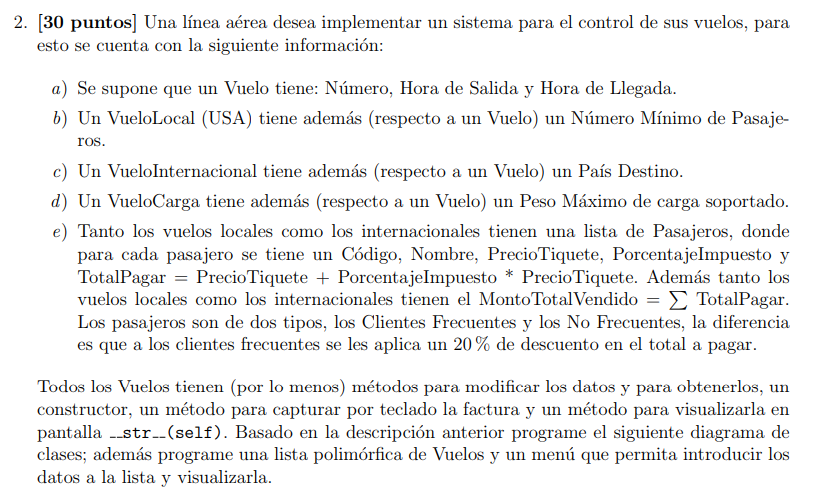

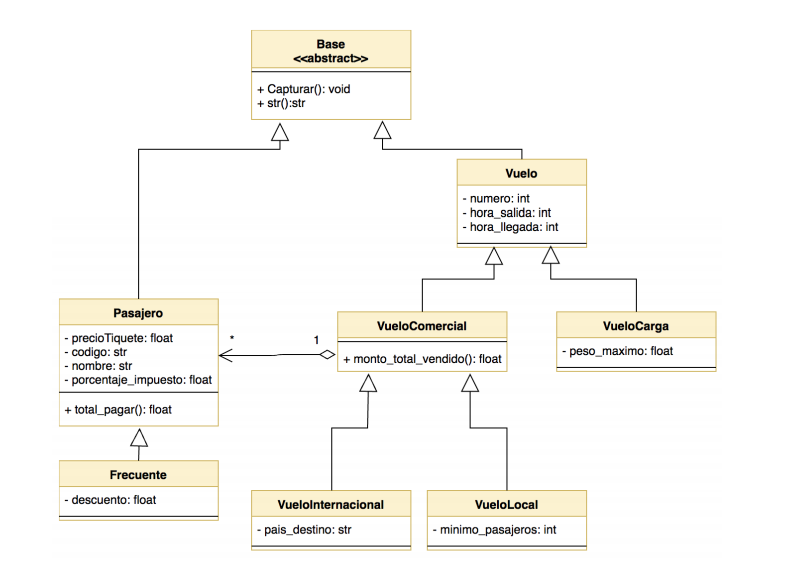

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 24 20:04:59 2019

@author: Andrey
"""

from abc import  ABCMeta, abstractmethod

# Clase Abstracta, ABC Class
class Base(metaclass = ABCMeta):    
    @abstractmethod
    def __str__(self):
        pass    
    @abstractmethod
    def Captura(self):
        pass
    
class Vuelo(Base):
    def __init__(self, numero = 0, hora_salida = 0, hora_llegada = 0):
        self.__numero = numero
        self.__hora_salida = hora_salida
        self.__hora_llegada = hora_llegada
        
    @property
    def numero(self):
        return self.__numero
    @numero.setter
    def numero(self, numero):
        self.__numero = numero
    
    @property
    def hora_salida(self):
        return self.__hora_salida
    @hora_salida.setter
    def hora_salida(self, hora_salida):
        self.__hora_salida = hora_salida

    @property
    def hora_llegada(self):
        return self.__hora_llegada
    @hora_llegada.setter
    def hora_llegada(self, hora_llegada):
        self.__hora_llegada = hora_llegada
    
    def __str__(self):
        return "Numero de vuelo:%i\nHora de Salida:%i\nHora de Llegada:%i" % (self.numero,self.hora_salida, self.hora_llegada)
    
    def Captura(self):
        self.numero = int(input("Digite el numero del vuelo: "))
        self.hora_salida = int(input("Digite la hora de salida:"))
        self.hora_llegada = int(input("Digite la hora de llegada:"))
        
class VueloCarga(Vuelo):
    def __init__(self,  numero = 0, hora_salida = 0, hora_llegada = 0, peso_maximo = 0):
        super().__init__( numero, hora_salida, hora_llegada)
        self.__peso_maximo = peso_maximo
        
    @property
    def peso_maximo(self):
        return self.__peso_maximo
    @peso_maximo.setter
    def peso_maximo(self, peso_maximo):
        self.__peso_maximo = peso_maximo
        
    def __str__(self):
        s = super().__str__()
        s += "\nPeso Máximo:%f\n"
        return s % (self.peso_maximo)
    
    def Captura(self):
        Vuelo.Captura(self)
        self.peso_maximo = int(input("Digite el peso máximo:"))
        
class VueloComercial(Vuelo):
    def __init__(self,  numero = 0, hora_salida = 0, hora_llegada = 0, pasajeros = []):
        super().__init__(numero, hora_salida, hora_llegada)
        self.__pasajeros = pasajeros
        
    @property
    def pasajeros(self):
        return self.__pasajeros
    @pasajeros.setter
    def peso_maximo(self, pasajeros):
        self.__pasajeros = pasajeros
    
    def monto_total_vendido(self):
        acum = 0
        for pasajero in self.pasajeros:
            acum += pasajero.total_pagar()
        return acum
    
    def __str__(self):
        s = "***************** Vuelo Comercial ************\n"
        s += "=====Pasajeros====="
        for pasajero in self.pasajeros:
            s = s +"\n\n"+ str(pasajero)
        s = s + "\n================"
        return s
    
    def Captura(self):
        numeroPasajeros = int(input("Numero de pasajeros a ingresar:"))
        for i in range(numeroPasajeros):
            pasajero = Pasajero()
            pasajero.Captura()
            self.pasajeros.append(pasajero)
        
class VueloLocal(VueloComercial):
    def __init__(self, numero = 0, hora_salida = 0, hora_llegada = 0, minimo_pasajeros = 0, porcentajeImpuesto = 0):
        super().__init__(numero, hora_salida, hora_llegada)
        self.__minimo_pasajeros = minimo_pasajeros
        
    @property
    def minimo_pasajeros(self):
        return self.__minimo_pasajeros
    @minimo_pasajeros.setter
    def minimo_pasajeros(self, minimo_pasajeros):
        self.__minimo_pasajeros = minimo_pasajeros
        
    def __str__(self):
        s = super().__str__()
        s += "\nMinimo de pasajeros:%i\n"
        return s % (self.minimo_pasajeros)
    
    def Captura(self):
        Vuelo.Captura(self)
        self.minimo_pasajeros = int(input("Digite el mínimo de pasajeros:"))
        
class VueloInternacional(VueloComercial):
    def __init__(self, numero = 0, hora_salida = 0, hora_llegada = 0, pais_destino = "no definido", porcentajeImpuesto = 0):
        super().__init__( numero, hora_salida, hora_llegada)
        self.__pais_destino = pais_destino
        
    @property
    def pais_destino(self):
        return self.__pais_destino
    @pais_destino.setter
    def pais_destino(self, pais_destino):
        self.__pais_destino = pais_destino
    
    def __str__(self):
        s = super().__str__()
        s += "\nPaís de destino:%s\n"
        return s % (self.pais_destino)
    
    def Captura(self):
        Vuelo.Captura(self)
        self.pais_destino = input("Digite el país de destino:")
        
class Pasajero(Base):
    def __init__(self, codigo = "", nombre = "", precio_boleto = 0, porcentajeImpuesto= 0):
        self.__codigo = codigo
        self.__nombre = nombre
        self.__precio_boleto = precio_boleto
        self.__porcentajeImpuesto = porcentajeImpuesto
        
    @property
    def codigo(self):
        return self.__codigo
    @codigo.setter
    def codigo(self, codigo):
        self.__codigo = codigo
    
    @property
    def nombre(self):
        return self.__nombre
    @nombre.setter
    def nombre(self, nombre):
        self.__nombre = nombre

    @property
    def precio_boleto(self):
        return self.__precio_boleto
    @precio_boleto.setter
    def precio_boleto(self, precio_boleto):
        self.__precio_boleto = precio_boleto
        
    @property
    def porcentajeImpuesto(self):
        return self.__porcentajeImpuesto
    @porcentajeImpuesto.setter
    def porcentajeImpuesto(self, porcentajeImpuesto):
        self.__porcentajeImpuesto = porcentajeImpuesto
    
    def total_pagar(self):
        return self.precio_boleto + self.porcentajeImpuesto * self.precio_boleto
    
    def __str__(self):
        return "Codigo:%s\nNombre:%s\nPrecio Boleto:%f\nPorcentaje Impuesto:%f" % (self.codigo,self.nombre, self.precio_boleto, self.porcentajeImpuesto)
    
    def Captura(self):
        self.codigo = input("Digite el codigo del pasajero:")
        self.nombre = input("Digite el nombre del pasajero:")
        self.precio_boleto = float(input("Digite el precio del tiquete:"))
        self.porcentajeImpuesto = float(input("Digite el porcentaje del impuesto:"))
    
class PasajeroFrecuente(Pasajero):
    def __init__(self, codigo = "", nombre = "", precio_boleto = 0, porcentajeImpuesto = 0, descuento = 0.2):
        super().__init__(codigo, nombre, precio_boleto, porcentajeImpuesto)
        self.__descuento = descuento
        
    @property
    def descuento(self):
        return self.__descuento
    @descuento.setter
    def descuento(self, descuento):
        self.__descuento = descuento
        
    def total_pagar(self):
        return self.precio_boleto + self.porcentajeImpuesto * self.precio_boleto - (self.precio_boleto * self.descuento)
    
    def __str__(self):
        s = super().__str__()
        s += "\nDescuento:%s\n"
        return s % (self.descuento)
    
    def Captura(self):
        Pasajero.Captura(self)
        self.descuento = input("Digite el descuento del pasajero:")
        
import os

class Lectura:
    def LeeDatosVuelo(self):
        vuelo = Vuelo()
        os.system('cls') #en windows
        print("***Bienvenido a ingresar un vuelo***")
        vuelo.Captura()
        return vuelo
    def LeeDatosVueloCarga(self):
        vuelo = VueloCarga()
        os.system('cls') #en windows
        print("***Bienvenido a ingresar un vuelo de carga***")
        vuelo.Captura()
        return vuelo
    def LeeDatosVueloInternacional(self):
        vuelo = VueloInternacional()
        os.system('cls') #en windows
        print("***Bienvenido a ingresar un vuelo internacional***")
        vuelo.Captura()
        return vuelo
    def LeeDatosVueloLocal(self):
        vuelo = VueloLocal()
        os.system('cls') #en windows
        print("***Bienvenido a ingresar un vuelo internacional***")
        vuelo.Captura()
        return vuelo


class App:
    def __init__(self):
        self.__lista = list()
        self.__lec = Lectura()
    def __menu(self):
        print("\n"*50)
        os.system('cls') #en windows
        print(" ==================================================== ")
        print(" [1] Insertar Vuelo ")
        print(" [2] Insertar Vuelo de carga")
        print(" [3] Insertar Vuelo Internacional")
        print(" [4] Insertar Vuelo Local")
        print(" [5] Ver la Lista Polimorfica" )
        print(" [6] Borrar la Lista Polimorfica")
        print(" [7] Salir")
        print(" ==================================================== ")
        return input("> ")
    def __mostrarLista(self):
        print("\n"*50)
        #os.system('Clear') #os.system('cls') #en windows
        for i in range(len(self.__lista)):
            print(self.__lista[i])
            print(15 * "*" + "\n")
    def principal(self):
        respuesta = ""
        while respuesta != "7":
            respuesta = self.__menu()
            if respuesta == "1":
                self.__lista.append(self.__lec.LeeDatosVuelo())
            elif respuesta == "2":
                self.__lista.append(self.__lec.LeeDatosVueloCarga())
            elif respuesta == "3":
                self.__lista.append(self.__lec.LeeDatosVueloInternacional())
            elif respuesta == "4":
                self.__lista.append(self.__lec.LeeDatosVueloLocal())
            elif respuesta == "5":
                self.__mostrarLista()
                input("Digite cualquier tecla para continuar...")
            elif respuesta == "6":
                self.__lista.clear()

prueba = App()
#prueba.principal() # Descomentar para capturar